In [24]:
import numpy as np
import pandas as pd

In [25]:
data=pd.read_csv('/content/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
cropname_label_encoder = LabelEncoder()
data["label"] = cropname_label_encoder.fit_transform(data["label"])

In [28]:
cropname_dict = {}
for i in range(len(data["label"].unique())):
    cropname_dict[i] = cropname_label_encoder.inverse_transform([i])[0]
print(cropname_dict)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [29]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [30]:
data.shape

(2200, 8)

In [31]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [32]:
X = data.drop(columns=['label'],axis=1)
Y = data.label

In [33]:
X.shape

(2200, 7)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

RF :- 0.9659090909090909
ET :- 0.9522727272727273
BAG :- 0.9954545454545455
ADA :- 0.17272727272727273
GBC :- 0.9795454545454545
VOTING :- 0.9954545454545455


<BarContainer object of 6 artists>

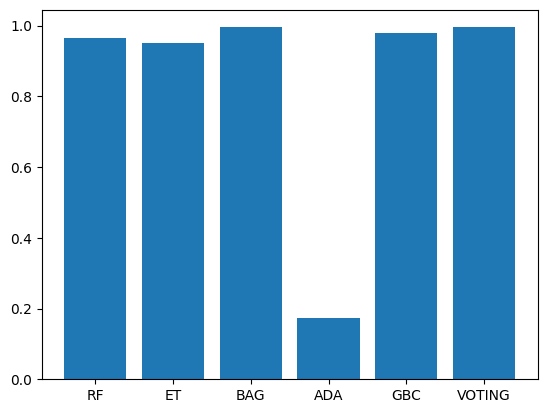

In [35]:
# bagging
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
clf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf2=ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf3=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0,
                      bootstrap=True) #base_estimator=knn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf4=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)#base_estimator=knn
clf5=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)
from sklearn.ensemble import VotingClassifier
clf6=VotingClassifier(estimators=[('rf',clf1),('et',clf2),('bag',clf3),('ada',clf4),
                                 ('gbc',clf5)], voting='soft',weights=[1,1,1,1,1])
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['RF','ET','BAG','ADA','GBC','VOTING']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
    st=time.time()#
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    et=time.time()#
    acc[model_name]=accuracy_score(pred,y_test)
    T[model_name]=et-st#
for i,j in acc.items():
    print(i,':-',j)
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())

In [36]:
train_pred = clf3.predict(x_train)
test_pred = clf3.predict(x_test)

In [37]:
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)

In [38]:
train_acc,test_acc

(0.9994318181818181, 0.9954545454545455)

In [40]:
clf3.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([20])

In [39]:
import pickle
with open('croprecommendation.pkl','wb') as files:
  pickle.dump(clf3,files)